# HOW TO HANDLE `'IMBALANCED OR UNBALANCED'` DATASET?

**Unbalanced Dataset:- It is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes OR the number of observations belonging to one class is significantly higher than those belonging to the other classes**

**This problem is predominant in scenarios where anomaly detection is crucial like electricity pilferage, fraudulent transactions in banks, identification of rare diseases, etc. In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.**

**This happens because Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.**

NOTE - **For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, it is usually referred to as a rare event.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Below is a list of ten examples of problem domains where the class distribution of examples is inherently imbalanced.

Many classification problems may have a severe imbalance in the class distribution; nevertheless, looking at common problem domains that are inherently.

`Fraud Detection.`

`Claim Prediction.`

`Default Prediction.`

`Churn Prediction.`

`Spam Detection.`

`Anomaly Detection.`

`Outlier Detection.`

`Intrusion Detection`

`Conversion Prediction.`

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Approach for handling `Imbalanced Data`.

The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes. Let us look at a few resampling techniques:

### 1. Random Under-Sampling

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 2. Random Over-Sampling

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 3. SMOTE 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# ABOUT DATASET

-- THIS DATASETS CONTAINS TRANASACTIONS MADE BY CREDIT CARDS IN SEPTEMBER 2013 BY EUROPEAN CARDHOLDERS. THIS DATASET CONTAINS THOSE TRANSACTIONS THAT OCCURED IN 2 DAYS.

-- HERE WE HAVE 492 FRAUDS OUT OF 284,807 TRANSACTIONS. 

-- THE DATASET IS HIGHLY UNBALANCED. 

-- FRAUDS ARE CONSIDERED AS POSITIVE CLASS WHICH ACCOUNTS FOR 0.172% OF ALL TRANSACTIONS.

-- FEATURE 'TIME' CONTAINS THE SECONDS ELAPSED BETWEEN EACH TRANSACTION AND THE FIRST TRANSACTION AND THE FIRST TRANSACTION IN THE DATASET.

-- FEATURE 'AMOUNT' IS THE TRANSACTION AMOUNT, THIS FEATURE CAN BE USED FOR EXAMPLE-DEPENDANT COST-SENSITIVE LEARNING.

-- OUTPUT 1-----> CASE OF FRAUD\
-- OUTPUT 0-----> OTHERWISE

#### THE DATA CONTAINS NUMERICAL INPUT VARIABLES WHICH ARE TRANSFORMED BY PCA EXCEPT 'TIME' AND 'AMOUNT' FEAUTRE.
#### DUE TO THE `CONFIDENTIALITY` ISSUES THE ORIGINAL FEATURES ARE NOT PROVIDED IN THE DATA.

In [37]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

In [66]:
df=pd.read_csv('credit-card.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [67]:
df.shape

(9492, 32)

In [68]:
df['Class'].value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [69]:
#Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [72]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [74]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\VIVEK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [75]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2686    7]
 [  27  128]]
0.988061797752809
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2693
           1       0.95      0.83      0.88       155

    accuracy                           0.99      2848
   macro avg       0.97      0.91      0.94      2848
weighted avg       0.99      0.99      0.99      2848



In [76]:
y_train.value_counts()

0    6307
1     337
Name: Class, dtype: int64

In [77]:
class_weight=dict({0:1,1:100})

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

#### The `features of the minority class` are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

#### Evaluation of a classification algorithm performance is measured by the Confusion Matrix which contains information about the actual and the predicted class.

In [79]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2693    0]
 [  35  120]]
0.9877106741573034
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2693
           1       1.00      0.77      0.87       155

    accuracy                           0.99      2848
   macro avg       0.99      0.89      0.93      2848
weighted avg       0.99      0.99      0.99      2848



## UNDERSAMPLING

Random Undersampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

Total Observations = 1000

Fraudulent Observations = 20

Non Fraudulent Observations = 980

Event Rate= 2 %

In this case we are taking 10 % samples without replacement from Non Fraud instances.  And combining them with Fraud instances.

Non Fraudulent Observations after random under sampling = 10 % of 980 =98

Total Observations after combining them with Fraudulent observations = 20+98=118

Event Rate for the new dataset after under sampling = 20/118 = 17%

 

Advantage:-

1. It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.


Disadvantages:-

1. It can discard potentially useful information which could be important for building rule classifiers.





2. The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.
 

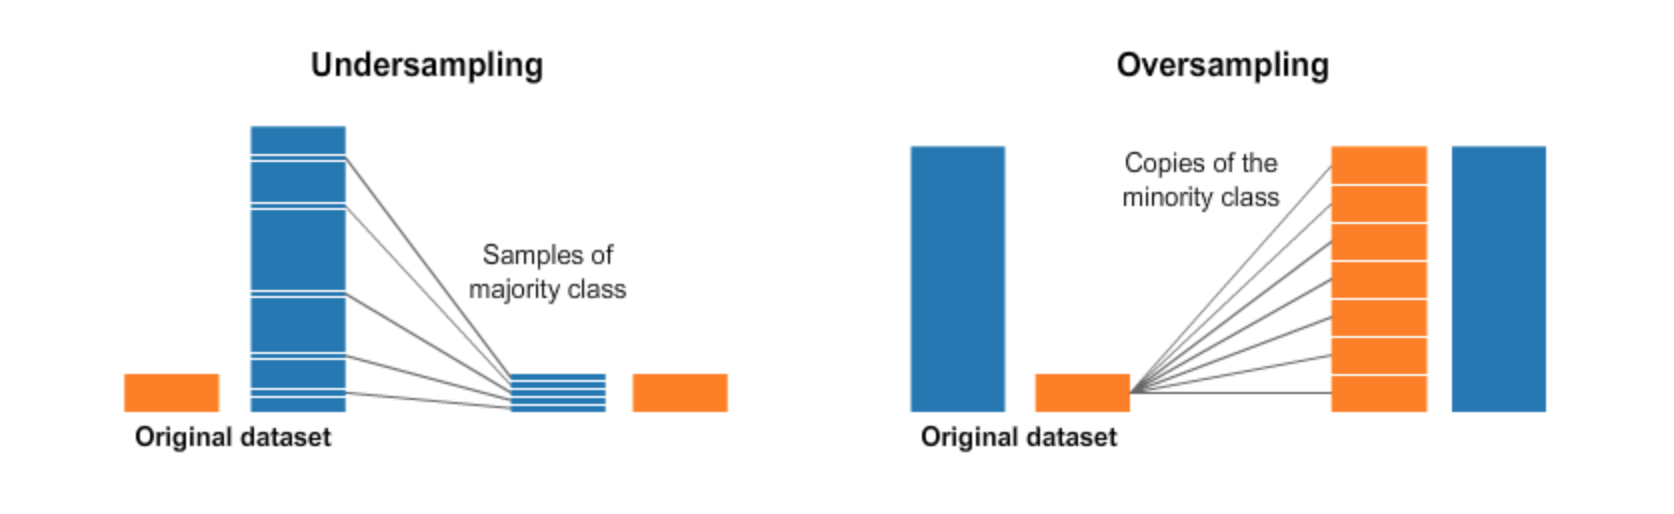

In [80]:
from collections import Counter
Counter(y_train)

Counter({0: 6307, 1: 337})

In [81]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [82]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 6307, 1: 337})
The number of classes after fit Counter({0: 421, 1: 337})


C:\Users\VIVEK\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [84]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2549  144]
 [  15  140]]
0.9441713483146067
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2693
           1       0.49      0.90      0.64       155

    accuracy                           0.94      2848
   macro avg       0.74      0.92      0.80      2848
weighted avg       0.97      0.94      0.95      2848



## OVERSAMPLING

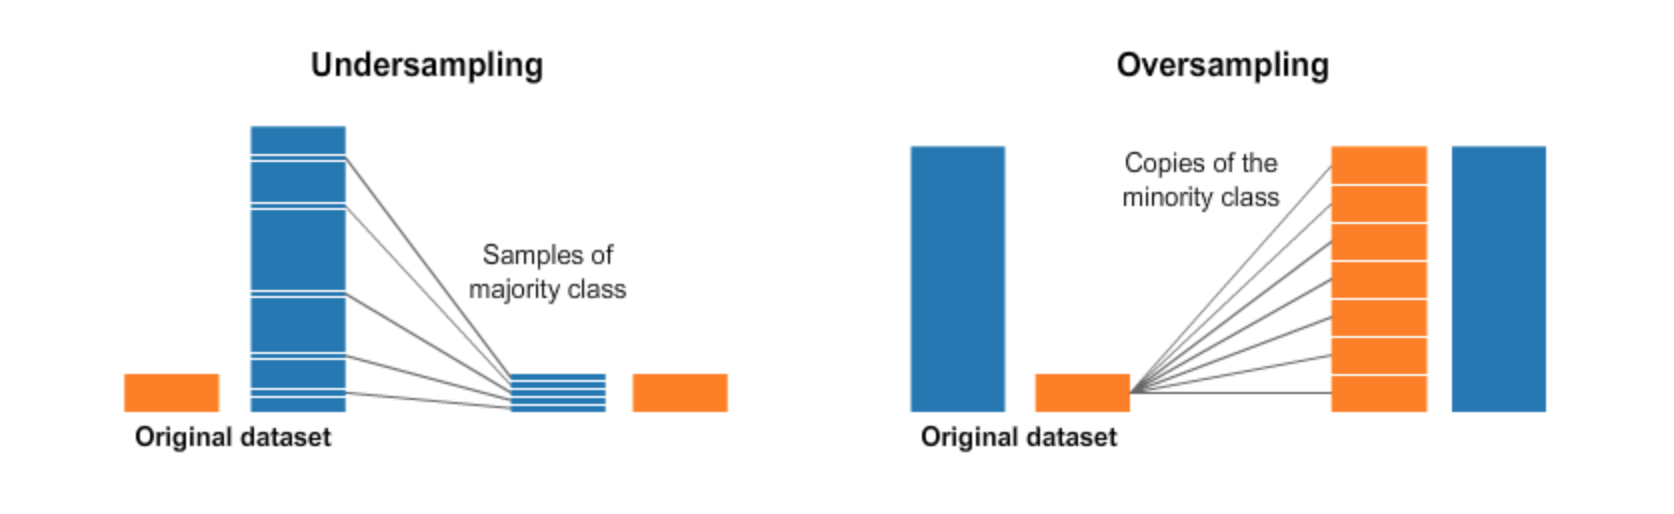

Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

Total Observations = 1000

Fraudulent   Observations = 20

Non Fraudulent Observations = 980

Event Rate= 2 %

In this case we are replicating 20 fraud observations 20 times.

Non Fraudulent Observations = 980

Fraudulent Observations after replicating the minority class observations = 400

Total Observations in the new data set after oversampling= 1380

Event Rate for the new data set after under sampling= 400/1380 = 29 %

Advantages:-

1. Unlike under sampling this method leads to no information loss.





2. Outperforms under sampling.

Disadvantages:-

1. It increases the likelihood of overfitting since it replicates the minority class events.

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 6307, 1: 337})
The number of classes after fit Counter({0: 6307, 1: 4730})


C:\Users\VIVEK\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [88]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2691    2]
 [  28  127]]
0.9894662921348315
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2693
           1       0.98      0.82      0.89       155

    accuracy                           0.99      2848
   macro avg       0.99      0.91      0.94      2848
weighted avg       0.99      0.99      0.99      2848



## SMOTE

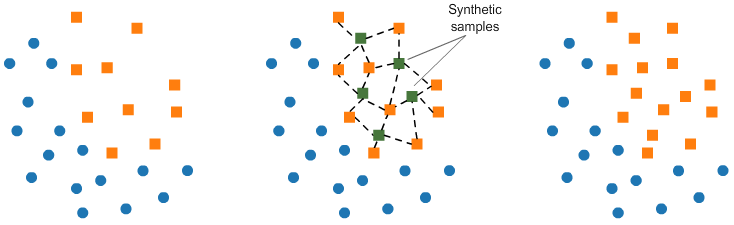

**This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.**

Total Observations = 1000

Fraudulent  Observations = 20

Non Fraudulent Observations = 980

Event Rate = 2%

A sample of 15 instances is taken from the minority class and similar synthetic instances are generated 20 times

Post generation of synthetic instances, the following data set is created

Minority Class (Fraudulent Observations) = 300

Majority Class (Non-Fraudulent Observations) = 980

Event rate= 300/1280 = 23.4%

 

Advantages:-
    
1. Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances.




2. No loss of useful information.

Disadvantages:-
    
1. While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise.





2. SMOTE is not very effective for high dimensional data.

In [89]:
from imblearn.combine import SMOTETomek

In [90]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 6307, 1: 337})
The number of classes after fit Counter({0: 5834, 1: 4257})


C:\Users\VIVEK\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [92]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2688    5]
 [  25  130]]
0.9894662921348315
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2693
           1       0.96      0.84      0.90       155

    accuracy                           0.99      2848
   macro avg       0.98      0.92      0.95      2848
weighted avg       0.99      0.99      0.99      2848



# THANK-YOU!